# Basics of NLP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tokenization : Example

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/gshyam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
text = "This is Andrew's text, isn't it?"
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokenizer.tokenize(text)

['This', 'is', "Andrew's", 'text,', "isn't", 'it?']

In [4]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Andrew', "'s", 'text', ',', 'is', "n't", 'it', '?']

In [5]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Andrew', "'", 's', 'text', ',', 'isn', "'", 't', 'it', '?']

# Stemming : Example

In [6]:
text = "feet wolves cats talked"
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
print (tokens)

['feet', 'wolves', 'cats', 'talked']


In [7]:
stemmer = nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tokens)

'feet wolv cat talk'

In [8]:
stemmer = nltk.stem.WordNetLemmatizer()
" ".join(stemmer.lemmatize(token) for token in tokens)

'foot wolf cat talked'

# Tf-Idf : Example

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
texts = [ "good movie", "not a good movie", "did not like", "i like it", "good one" ]
# using default tokenizer in TfidfVectorizer
tfidf= TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))

features = tfidf.fit_transform(texts)

print ('features:\n',features)
pd.DataFrame( features.todense(), columns=tfidf.get_feature_names() )

features:
   (0, 0)	0.7071067811865476
  (0, 2)	0.7071067811865476
  (1, 3)	0.5773502691896257
  (1, 0)	0.5773502691896257
  (1, 2)	0.5773502691896257
  (2, 1)	0.7071067811865476
  (2, 3)	0.7071067811865476
  (3, 1)	1.0


,good movie,like,movie,not
0,0.707107,0.000000,0.707107,0.000000
1,0.577350,0.000000,0.577350,0.577350
2,0.000000,0.707107,0.000000,0.707107
3,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000


## Abstract Syntax Trees (AST) : Examples

In [10]:
import ast
str_dict1 = "{'a':1, 'b':2}"; dict1 = ast.literal_eval(str_dict1)
str_lst1 = "[1,2,3,4]"; lst1=ast.literal_eval(str_lst1)
str_lst2 = "['php', 'mysql']"; lst2=ast.literal_eval(str_lst2)

#Now we can treat lst1 and lst2 as regular lists and dict1 as python dictionary
print (len(lst1), len(lst2) )
print (dict1.keys() )

4 2
dict_keys(['a', 'b'])


# Counter : Example

In [11]:
from collections import Counter

strr= 'abcdeabcdabcaba'
c = Counter(strr)  # count elements from a string

print ('original string:', strr)
print  ( 'most_common:', c.most_common(3) )
print  ( 'sorted:', sorted(c) )
print ( 'list elements with repetitions:', ''.join(sorted(c.elements())) )
print ()

lst=['aaa', 'abc', 'def', 'aaa', 'abc', 'aaa', 'def', 'aa']
c = Counter(lst)
print ('original list:', lst)
print  ( 'most_common:', c.most_common(3) )
print  ( 'sorted:', sorted(c) )
print ( 'list elements with repetitions:', ''.join(sorted(c.elements())) )


original string: abcdeabcdabcaba
most_common: [('a', 5), ('b', 4), ('c', 3)]
sorted: ['a', 'b', 'c', 'd', 'e']
list elements with repetitions: aaaaabbbbcccdde

original list: ['aaa', 'abc', 'def', 'aaa', 'abc', 'aaa', 'def', 'aa']
most_common: [('aaa', 3), ('abc', 2), ('def', 2)]
sorted: ['aa', 'aaa', 'abc', 'def']
list elements with repetitions: aaaaaaaaaaaabcabcdefdef


# Sort : Example

In [12]:
py_set = {'e', 'a', 'u', 'o', 'i'}
print(sorted(py_set, reverse=True))

py_dict = {'e': 1, 'a': 2, 'u': 3, 'o': 4, 'i': 5}
print(sorted(py_dict, reverse=True))

frozen_set = frozenset(('e', 'a', 'u', 'o', 'i'))
print(sorted(frozen_set, reverse=True))


['u', 'o', 'i', 'e', 'a']
['u', 'o', 'i', 'e', 'a']
['u', 'o', 'i', 'e', 'a']


In [13]:
def take_first(x): return x[0]
def take_second(x): return x[1]

# random list
random = [(2, 2), (3, 4), (4, 1), (1, 3)]
print('Sorted with first element :', sorted(random, key=take_first) )
print('Sorted with second element:', sorted(random, key=take_second) )

Sorted with first element : [(1, 3), (2, 2), (3, 4), (4, 1)]
Sorted with second element: [(4, 1), (2, 2), (1, 3), (3, 4)]


In [14]:
# List elements: (Student's Name, Marks out of 100 , Age)
participant_list = [ ('Alison', 50, 18), ('Terence', 75, 12), ('David', 75, 20), ('Jimmy', 90, 22),('Jak', 50, 17) ]
def sorter(item):
    # Since highest marks first, least error = most marks
    error = 100 - item[1]
    age = item[2]
    return (error, age)

sorted_list = sorted(participant_list, key=sorter)
print(sorted_list)

[('Jimmy', 90, 22), ('Terence', 75, 12), ('David', 75, 20), ('Jak', 50, 17), ('Alison', 50, 18)]


In [15]:
py_dict = {'a': 5, 'b': 1, 'c': 4, 'd': 6, 'e': 2}

sorted(py_dict.items(), key=lambda x: x[1], reverse=True)[:3]

[('d', 6), ('a', 5), ('c', 4)]

# Sparce matrix from SciPy : Example

     csr_matrix: Compressed Sparse Row format

In [16]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import lil_matrix
A = csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
v = np.array([1, 0, -1])
A.dot(v)

AA = lil_matrix((5,6))
AA

<5x6 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in List of Lists format>

In [17]:
from scipy import sparse as sp_sparse
from numpy.random import rand

A = sp_sparse.lil_matrix((1000, 1000))
A[0, :100] = rand(100)
A[1, 100:200] = A[0, :100]
A.setdiag(rand(1000))

In [18]:
A = A.tocsr()
b = rand(1000)
x = sp_sparse.linalg.spsolve(A, b)

# TF-IDF

**short for Term Frequency–Inverse Document Frequency**

In the following example of a simple text

A vocabulary of 8 words is learned from the documents and each word is assigned a unique integer index in the output vector.

The inverse document frequencies are calculated for each word in the vocabulary, assigning the lowest score of 1.0 to the most frequently observed word: “the” at index 7.

Finally, the first document is encoded as an 8-element sparse array and we can review the final scorings of each word with different values for “the“, “fox“, and “dog” from the other words in the vocabulary.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
        "The dog.",
        "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print('\nvectorizer.vocabulary_:',vectorizer.vocabulary_)
print('\nvectorizer.idf_:',vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print('\nvector.shape:',vector.shape)
print('\nvector.toarray:',vector.toarray())


vectorizer.vocabulary_: {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}

vectorizer.idf_: [1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]

vector.shape: (1, 8)

vector.toarray: [[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
vectorizer = CountVectorizer() # create the transform
vectorizer.fit(text) # tokenize and build vocab

print('\nvectorizer.vocabulary_:',vectorizer.vocabulary_) # summarize
vector = vectorizer.transform(text) # encode document

print('\nvector.shape:',vector.shape)
print('\nvector.toarray:',vector.toarray())
print('\ntype(vector):', type(vector))
X = vectorizer.fit_transform(text)


vectorizer.vocabulary_: {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}

vector.shape: (1, 8)

vector.toarray: [[1 1 1 1 1 1 1 2]]

type(vector): <class 'scipy.sparse.csr.csr_matrix'>


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print (vectorizer.get_feature_names())
print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


# MultiLabelBinarizer

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
print ( mlb.fit_transform([(1, 2), (3,)]) )
#array([[1, 1, 0],
#       [0, 0, 1]])
print ( mlb.classes_ )
#array([1, 2, 3])

[[1 1 0]
 [0 0 1]]
[1 2 3]


In [23]:
mlb = MultiLabelBinarizer()
mlb.fit_transform([{'sci-fi', 'thriller'}, {'comedy'}])
#array([[0, 1, 1],
#       [1, 0, 0]])
print ( list(mlb.classes_) )
#['comedy', 'sci-fi', 'thriller']

['comedy', 'sci-fi', 'thriller']



# Project with StackOverflow posts

In this task you will deal with a dataset of post titles from StackOverflow. You are provided a split to 3 sets: *train*, *validation* and *test*. All corpora (except for *test*) contain titles of the posts and corresponding tags (100 tags are available). The *test* set is provided for Coursera's grading and doesn't contain answers. Upload the corpora using *pandas* and look at the data:

In [24]:
from ast import literal_eval

data_dir = "./datasets/"

In [25]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [26]:
train = read_data(data_dir+'train.tsv')
validation = read_data(data_dir+'validation.tsv')
test = pd.read_csv(data_dir+'test.tsv', sep='\t') # test doesn't have any tags

train.head(4)
#test.head(2)

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"


In [27]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

print ('training shape:', X_train.shape, 'validation shape:', X_val.shape, 'test shape:', X_test.shape)

training shape: (100000,) validation shape: (30000,) test shape: (20000,)


## Preparing the data

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gshyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
    text: a string
    return: modified initial string
    """

    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ',text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwors from text
    return text

In [30]:
# test above function
examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
            "How to free c++ memory vector<int> * arr?"]
answers = ["sql server equivalent excels choose function",
           "free c++ memory vectorint arr"]
for i in range(2):
    text = examples[i]
    ans = text_prepare(text)
    ans_correct = answers[i]
    print (i)
    print ('\n answer \t \t :', ans,
           '\n correct answer \t :', ans_correct,
           '\n both are equal \t :', ans==ans_correct)

0

 answer 	 	 : sql server equivalent excels choose function 
 correct answer 	 : sql server equivalent excels choose function 
 both are equal 	 : True
1

 answer 	 	 : free c++ memory vectorint arr 
 correct answer 	 : free c++ memory vectorint arr 
 both are equal 	 : True


In [31]:
# Prepare your data from train, test and validation set

In [32]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [33]:
print ( X_train[:2])
print ( X_test[:2])
print ( X_val[:2])


['draw stacked dotplot r', 'mysql select records datetime field less specified value']
['warning mysql_query expects parameter 2 resource object given', 'get click coordinates input typeimage via javascript']
['odbc_exec always fail', 'access base classes variable within child class']


In [34]:
y_train[:2]

array([list(['r']), list(['php', 'mysql'])], dtype=object)

## WordsTagsCount
Find 3 most popular tags and 3 most popular words in the train data and submit the results to earn the points.

In [35]:
from collections import Counter

# Dictionary of all tags from train corpus with their counts.
all_tags = [item for item_list in y_train for item in item_list]
tags_counts = Counter(all_tags)

# Dictionary of all words from train corpus with their counts.
#all_words = [word for line in X_train for word in line.split()]
ALL_WORDS = [word for line in X_train for word in line.split()]
words_counts = Counter(ALL_WORDS)


In [36]:
# The most common items in tags and words
print ( 'The top 3 tags:', tags_counts.most_common(3) )
print ( 'The top 3 words:', words_counts.most_common(3) )

The top 3 tags: [('javascript', 19078), ('c#', 19077), ('java', 18661)]
The top 3 words: [('using', 8278), ('php', 5614), ('java', 5501)]


In [37]:
# get a sorted dictionary
tags_counts_sorted  =  sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)
words_counts_sorted = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)

most_common_tags  = tags_counts_sorted[:3]
most_common_words = words_counts_sorted[:3]

print ('most_common_tags',most_common_tags)
print ('most_common_words',most_common_words)

most_common_tags [('javascript', 19078), ('c#', 19077), ('java', 18661)]
most_common_words [('using', 8278), ('php', 5614), ('java', 5501)]


### Transforming text to a vector

Machine Learning algorithms work with numeric data and we cannot use the provided text data "as is". There are many ways to transform text data to numeric vectors. In this task you will try to use two of them.

#### Bag of words

One of the well-known approaches is a *bag-of-words* representation. To create this transformation, follow the steps:
1. Find *N* most popular words in train corpus and numerate them. Now we have a dictionary of the most popular words.
2. For each title in the corpora create a zero vector with the dimension equals to *N*.
3. For each text in the corpora iterate over words which are in the dictionary and increase by 1 the corresponding coordinate.

Let's try to do it for a toy example. Imagine that we have *N* = 4 and the list of the most popular words is 

    ['hi', 'you', 'me', 'are']

Then we need to numerate them, for example, like this: 

    {'hi': 0, 'you': 1, 'me': 2, 'are': 3}

And we have the text, which we want to transform to the vector:

    'hi how are you'

For this text we create a corresponding zero vector 

    [0, 0, 0, 0]
    
And iterate over all words, and if the word is in the dictionary, we increase the value of the corresponding position in the vector:

    'hi':  [1, 0, 0, 0]
    'how': [1, 0, 0, 0] # word 'how' is not in our dictionary
    'are': [1, 0, 0, 1]
    'you': [1, 1, 0, 1]

The resulting vector will be 

    [1, 1, 0, 1]
   
Implement the described encoding in the function *my_bag_of_words* with the size of the dictionary equals to 5000. To find the most common words use train data. You can test your code using the function *test_my_bag_of_words*.

In [38]:
DICT_SIZE = 1000
VOCAB = words_counts.most_common(DICT_SIZE)  # already sorted
WORDS_TO_INDEX = {item[0]:ii for ii, item in enumerate(VOCAB) }
#VOCAB is already sorted hence we don't need to do the following.
#WORDS_TO_INDEX = {item[0]:ii for ii, item in enumerate( sorted(VOCAB, key=lambda x: x[1], reverse=True) ) }

INDEX_TO_WORDS = {ii:word for word, ii in WORDS_TO_INDEX.items()}

#print (WORDS_TO_INDEX)
#print (INDEX_TO_WORDS)

In [39]:
def my_bag_of_words(text, words_to_index, dict_size):
    result_vec = np.zeros(dict_size)
    for word in text.split():
        if word in words_to_index:
            result_vec[words_to_index[word]] +=1
    return result_vec
        

In [40]:
# test my bag of words
mytext = ['hi how are you']
words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3} # these are the most common words already found
ans = [1, 1, 0, 1]

for i, text in enumerate(mytext):
    vec = my_bag_of_words(text, words_to_index, 4)
    print ('obtained vector:', vec)
    print ('correct ansswer:', ans)
    print ( 'The two are equal (T/F):',(vec==ans).any() )
    
    

obtained vector: [1. 1. 0. 1.]
correct ansswer: [1, 1, 0, 1]
The two are equal (T/F): True


In [41]:
X_train_mybag = sp_sparse.vstack([ sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)


X_train shape  (100000, 1000)
X_val shape  (30000, 1000)
X_test shape  (20000, 1000)


## Bag Of Words

For the 11th row in X_train_mybag find how many non-zero elements it has. In this task the answer (variable non_zero_elements_count) should be a number, e.g. 20.



In [42]:
row = X_train_mybag[10].toarray()[0]

non_zero_elements_count = np.sum([1 for item in row if item != 0])
print (non_zero_elements_count)

4


## TF-IDF
Convert a collection of raw documents to a matrix of TF-IDF features.

    Implement function tfidf_features using class TfidfVectorizer from scikit-learn. Use train corpus to train a vectorizer. Don't forget to take a look into the arguments that you can pass to it. We suggest that you filter out too rare words (occur less than in 5 titles) and too frequent words (occur more than in 90% of the titles). Also, use bigrams along with unigrams in your vocabulary.
    
    First use TfidfVectorizer without token_pattern and see if you have 'c+' in tfidf_vocab if not then use '(\S+)' regexp as a token_pattern in the constructor of the vectorizer.


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features(X_train, X_val, X_test):
    # max_df and min_df is to filter out too frequent and too rare words
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),
                                 max_df=0.9, min_df=5,
                                 token_pattern='(\S+)' )
    
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    return (X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vectorizer.vocabulary_ )

In [44]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}


In [45]:
tfidf_vocab['c#']  

1879

## MultiLabel Classifier

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer

In [47]:
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

In [48]:
y_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [50]:
def train_classifier(X_train, y_train):
    model = OneVsRestClassifier(LogisticRegression(penalty='l2', C=1.0, max_iter=500))
    model.fit(X_train, y_train)
    return model


In [51]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [52]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

In [53]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails




### Evaluation

To evaluate the results we will use several classification metrics:
 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
 - [Area under ROC-curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
 - [Area under precision-recall curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) 
 
Make sure you are familiar with all of them. How would you expect the things work for the multi-label scenario? Read about micro/macro/weighted averaging following the sklearn links provided above.

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score   #  extra arguement 'average' is required for multiclass/multilabel targets.
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [55]:
def print_evaluation_scores(y_val, predicted):
    print ("Accracy={}".format(accuracy_score(y_val, predicted)), 
        "F1_macro={}".format(f1_score(y_val, predicted, average='macro')),
        "F1_micro={}".format(f1_score(y_val, predicted, average='micro')),
        "F1_wted={}".format(f1_score(y_val, predicted, average='weighted')),
        "Precsion_macro={}".format(average_precision_score(y_val, predicted, average='macro')),
        "Precsion_micro={}".format(average_precision_score(y_val, predicted, average='micro')),
        "Precsion_wted={}".format(average_precision_score(y_val, predicted, average='weighted')))

In [56]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)


Bag-of-words
Accracy=0.30733333333333335 F1_macro=0.48042789607695546 F1_micro=0.6225785774040394 F1_wted=0.603181533862139 Precsion_macro=0.3235746811091482 Precsion_micro=0.42836779433666106 Precsion_wted=0.4627357127118158
Tfidf
Accracy=0.33393333333333336 F1_macro=0.44547815697091925 F1_micro=0.6417333610694461 F1_wted=0.6142597768734821 Precsion_macro=0.3018188607439739 Precsion_micro=0.45691336931963544 Precsion_wted=0.4850181662633397


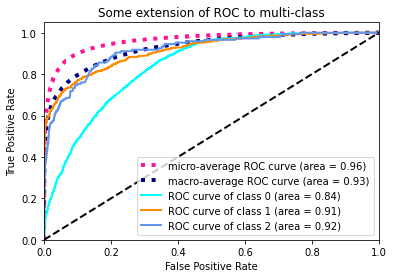

In [58]:
#from utility_metrics import roc_auc
from utils.wk1_utility_metrics import roc_auc


n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)


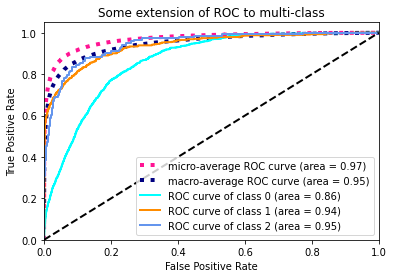

In [59]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)


## MultilabelClassification

Once we have the evaluation set up, we suggest that you experiment a bit with training your classifiers. We will use F1-score weighted as an evaluation metric. Our recommendation:

compare the quality of the bag-of-words and TF-IDF approaches and chose one of them.
for the chosen one, try L1 and L2-regularization techniques in Logistic Regression with different coefficients (e.g. C equal to 0.1, 1, 10, 100).
You also could try other improvements of the preprocessing / model, if you want.

In [60]:
######### YOUR CODE HERE #############
test_predictions = classifier_tfidf.predict(X_test_tfidf) 
test_pred_inversed = mlb.inverse_transform(test_predictions)

test_predictions_for_submission = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))
#grader.submit_tag('MultilabelClassification', test_predictions_for_submission)

In [63]:
print (test_predictions_for_submission[:100] )

0	php
1	javascript,jquery
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json
7	java
8	python
9	h


## Most Important Features

In [64]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words, all_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        all_words: all words in the dictionary
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    # Extract an estimator from the classifier for the given tag.
    # Extract feature coefficients from the estimator. 
    estimator = classifier.estimators_[tags_classes.index(tag)]
    coff = estimator.coef_[0]
    coff_idx = list(enumerate(coff))
    top_pos_words_idx = [idx for idx, wt in sorted(coff_idx, key=lambda x: x[1], reverse=True)[:5]]
    top_neg_words_idx = [idx for idx, wt in sorted(coff_idx, key=lambda x: x[1], reverse=False)[:5]]
    top_positive_words = [index_to_words[idx] for idx in top_pos_words_idx] # top-5 words sorted by the coefficiens.
    top_negative_words = [index_to_words[idx] for idx in top_neg_words_idx] # bottom-5 words  sorted by the coefficients.
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [65]:
print_words_for_tag(classifier_tfidf, 'c', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'c++', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)
print_words_for_tag(classifier_tfidf, 'linux', mlb.classes, tfidf_reversed_vocab, ALL_WORDS)


Tag:	c
Top positive words:	c, malloc, scanf, printf, gcc
Top negative words:	java, php, python, javascript, c#

Tag:	c++
Top positive words:	c++, qt, boost, mfc, opencv
Top negative words:	java, php, python, javascript, c#

Tag:	linux
Top positive words:	linux, ubuntu, c, address, signal
Top negative words:	javascript, c#, jquery, array, method

